In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev


# Zadanie 4
Prognozowanie zużycia energii. Wykorzystaj dane dotyczące zużycia energii z różnych
źródeł (np. domowe, przemysłowe) do prognozowania przyszłego zużycia energii. Przeprowadź interpolację wielomianową lub inną metodę interpolacji dla danych zużycia energii w różnych sektorach i porównaj ich dokładność prognozowania.


In [52]:
# Wczytanie Danych
data = pd.read_csv('data/Steel_industry_data.csv')
# Zamiana data['date'] na typ daty o formacie 'YYYY-MM-DD HH:MM:SS'
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
# Zamiana times na date bez potrzebnych godzin
data['date'] = pd.to_datetime(data['date']).dt.date
# Usunięcie rekordów gdzie 'time' się powtarza
data = data.drop_duplicates(subset='date')
# Sprawdzenie Nowych wymiarów
data.shape
#data.head()

(365, 11)

([<matplotlib.axis.XTick at 0x26462b3b310>,
 [Text(17532.0, 0, '2018-01-01'),
  Text(17552.0, 0, '2018-01-21'),
  Text(17572.0, 0, '2018-02-10'),
  Text(17592.0, 0, '2018-03-02'),
  Text(17612.0, 0, '2018-03-22'),
  Text(17632.0, 0, '2018-04-11'),
  Text(17652.0, 0, '2018-05-01'),
  Text(17672.0, 0, '2018-05-21'),
  Text(17692.0, 0, '2018-06-10'),
  Text(17712.0, 0, '2018-06-30'),
  Text(17732.0, 0, '2018-07-20'),
  Text(17752.0, 0, '2018-08-09'),
  Text(17772.0, 0, '2018-08-29'),
  Text(17792.0, 0, '2018-09-18'),
  Text(17812.0, 0, '2018-10-08'),
  Text(17832.0, 0, '2018-10-28'),
  Text(17852.0, 0, '2018-11-17'),
  Text(17872.0, 0, '2018-12-07'),
  Text(17892.0, 0, '2018-12-27')])

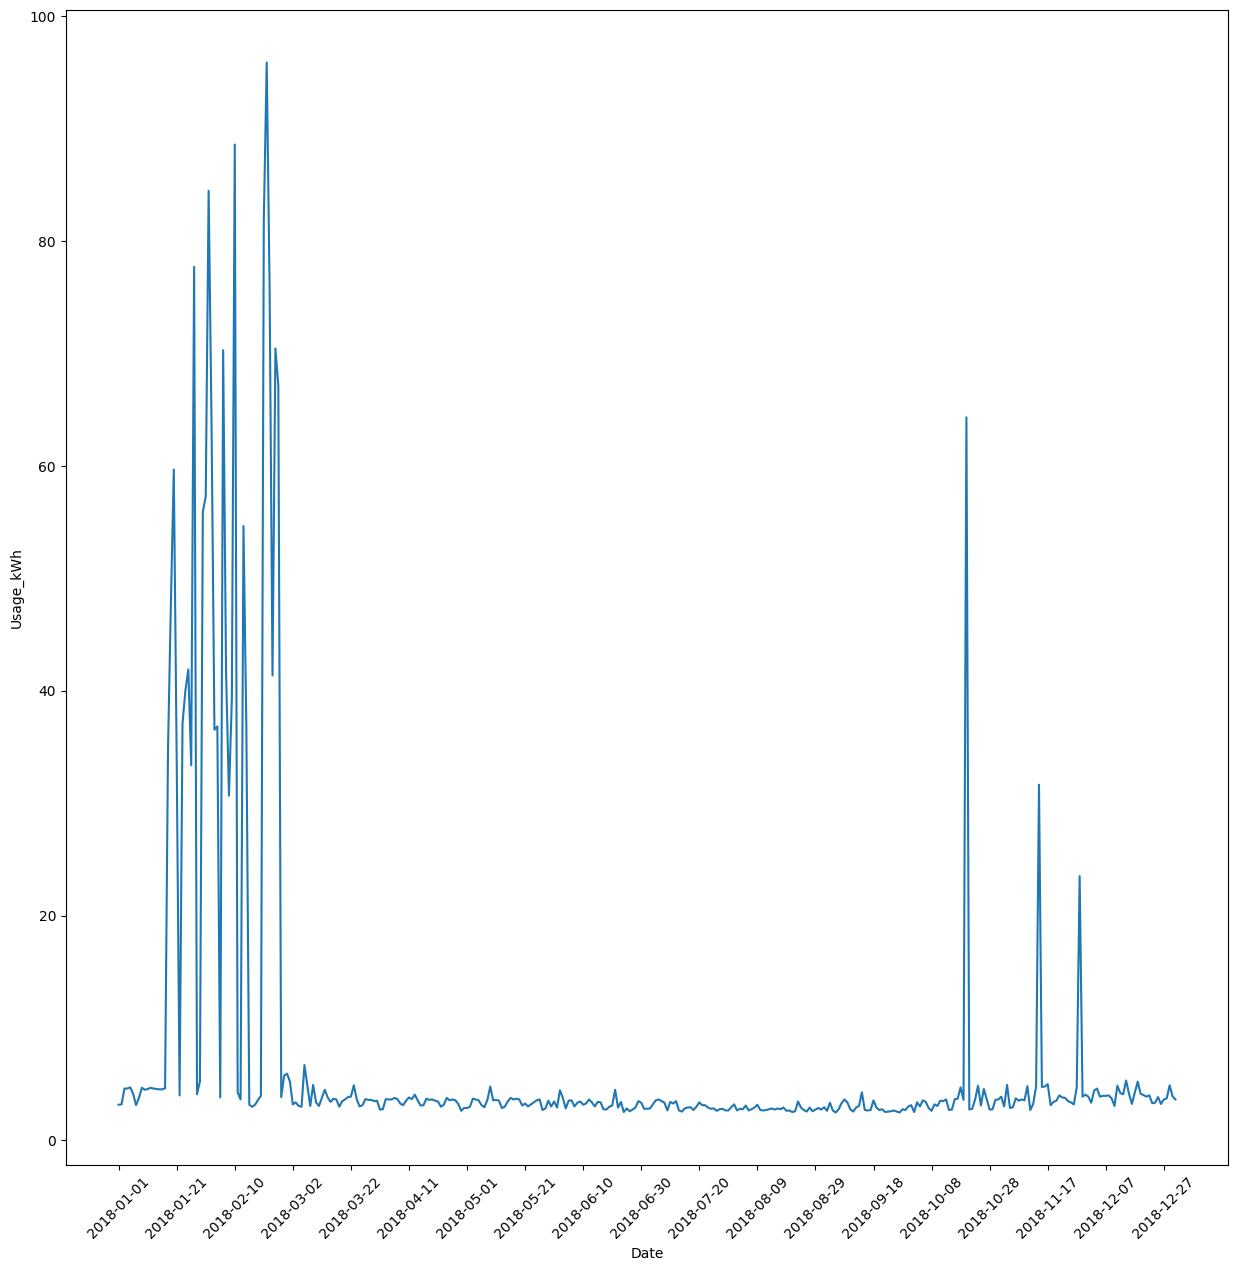

In [53]:
# Wyświetlenie wykresu zużycia energii
plt.rcParams['figure.figsize'] = [15, 15]
plt.plot(data['date'], data['Usage_kWh'])
# Wyświetlanie tylko część legendy na osi x
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.xticks(data['date'][::20], rotation=45)

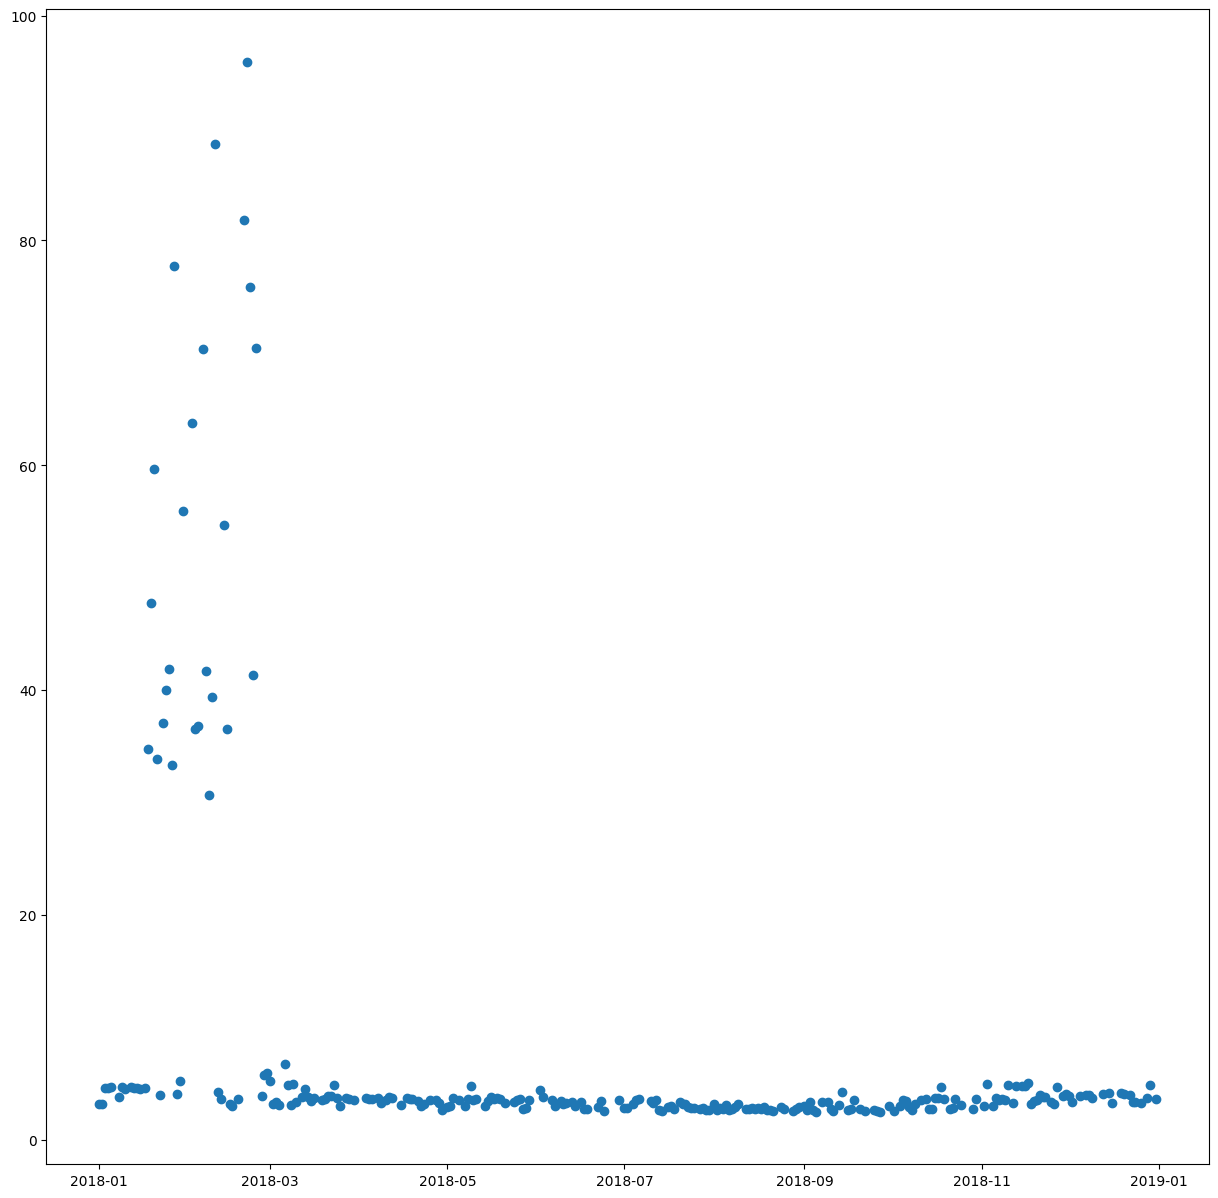

In [54]:
# Tworzenie Kopii danych
temp = []
n = 5
for a in range(n):
    temp.append(data.copy())
for a in range(n):
    temp[a]['Usage_kWh'] = temp[a]['Usage_kWh'].mask(np.random.random(data['Usage_kWh'].shape) < 0.3)

plt.scatter(data['date'], temp[0]['Usage_kWh'])

# Interpolacja liniowa

Text(0.5, 1.0, 'Interpolacja Liniowa')

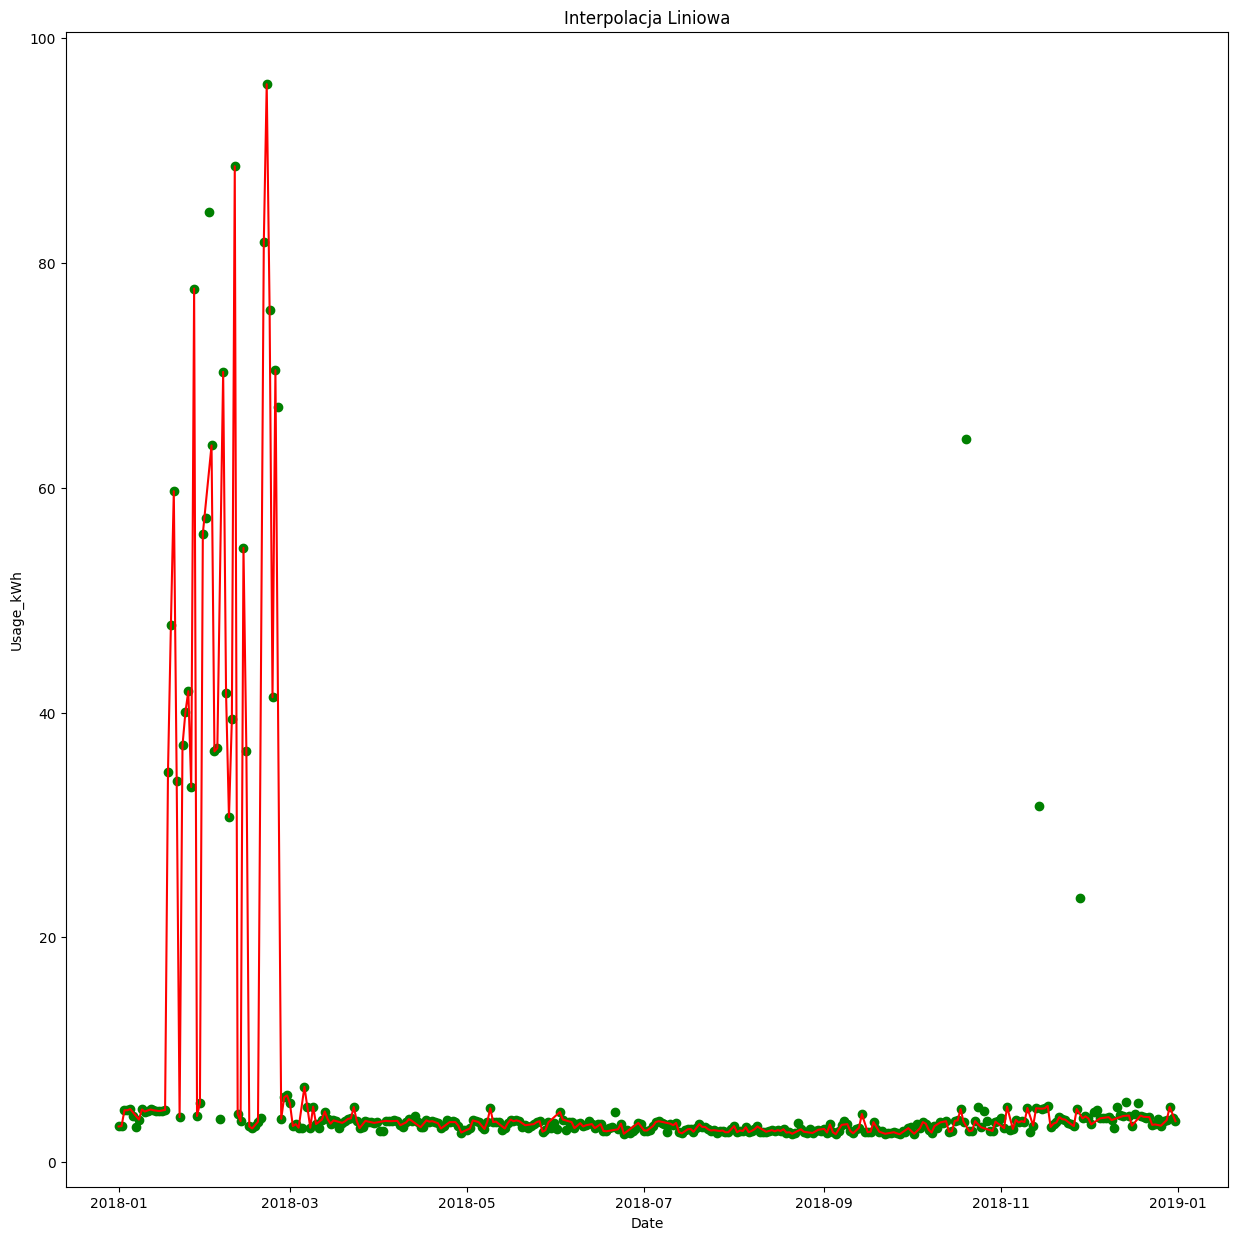

In [55]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Funkcja interpolacji liniowej
temp[0]['Usage_kWh'] = temp[0]['Usage_kWh'].interpolate(method='linear')
# Wizualizacja danych po interpolacji
plt.plot(temp[0]['date'], temp[0]['Usage_kWh'], color='red')
plt.scatter(data['date'], data['Usage_kWh'], color='green')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.title('Interpolacja Liniowa')

In [56]:
# Obliczenie dokładności za pomocą metody MSE
# Funkcja MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Obliczenie dokładności
print('Dokładność interpolacji liniowej:', mean_squared_error(temp[0]['Usage_kWh'], data['Usage_kWh']))

Dokładność interpolacji liniowej: 28.192205176560126


# Interpolacja Wielomianowa

Text(0.5, 1.0, 'Interpolacja Wielomianowa')

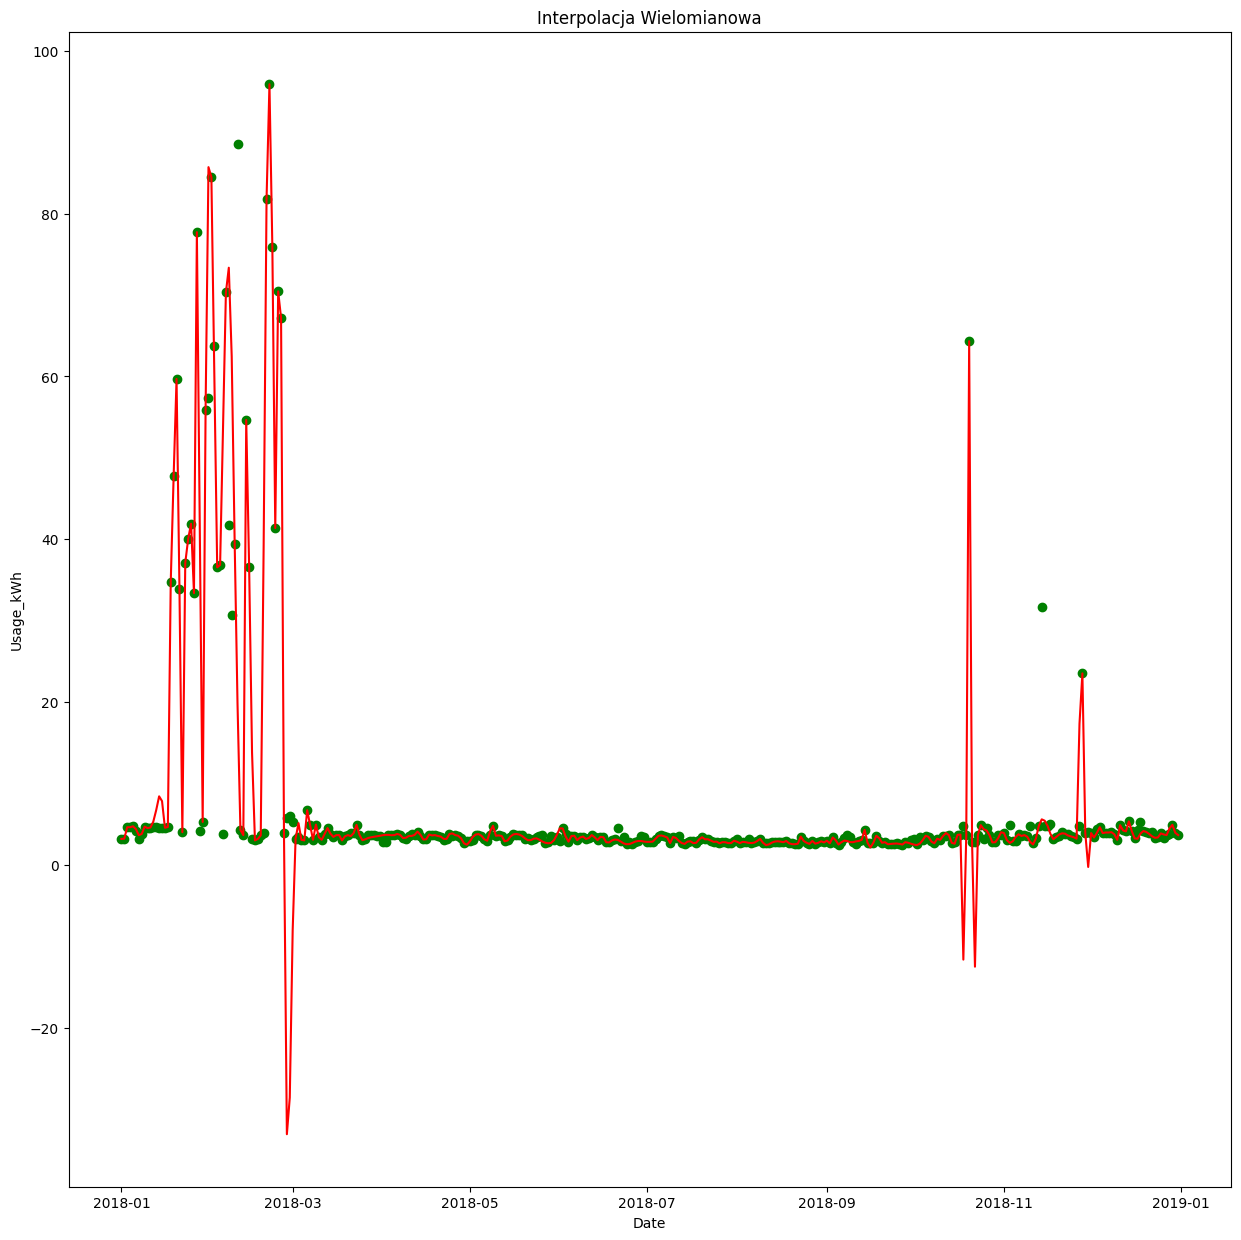

In [57]:
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Funkcja interpolacji liniowej
temp[1]['Usage_kWh'] = temp[1]['Usage_kWh'].interpolate(method='polynomial', order=2)
# Wizualizacja danych po interpolacji
plt.plot(temp[1]['date'], temp[1]['Usage_kWh'], color='red')
plt.scatter(data['date'], data['Usage_kWh'], color='green')
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.title('Interpolacja Wielomianowa')

In [58]:
# Obliczenie dokładności za pomocą metody MSE
# Funkcja MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Obliczenie dokładności
print('Dokładność interpolacji wielomianowej:', mean_squared_error(temp[1]['Usage_kWh'], data['Usage_kWh']))

Dokładność interpolacji wielomianowej: 46.81556861588638


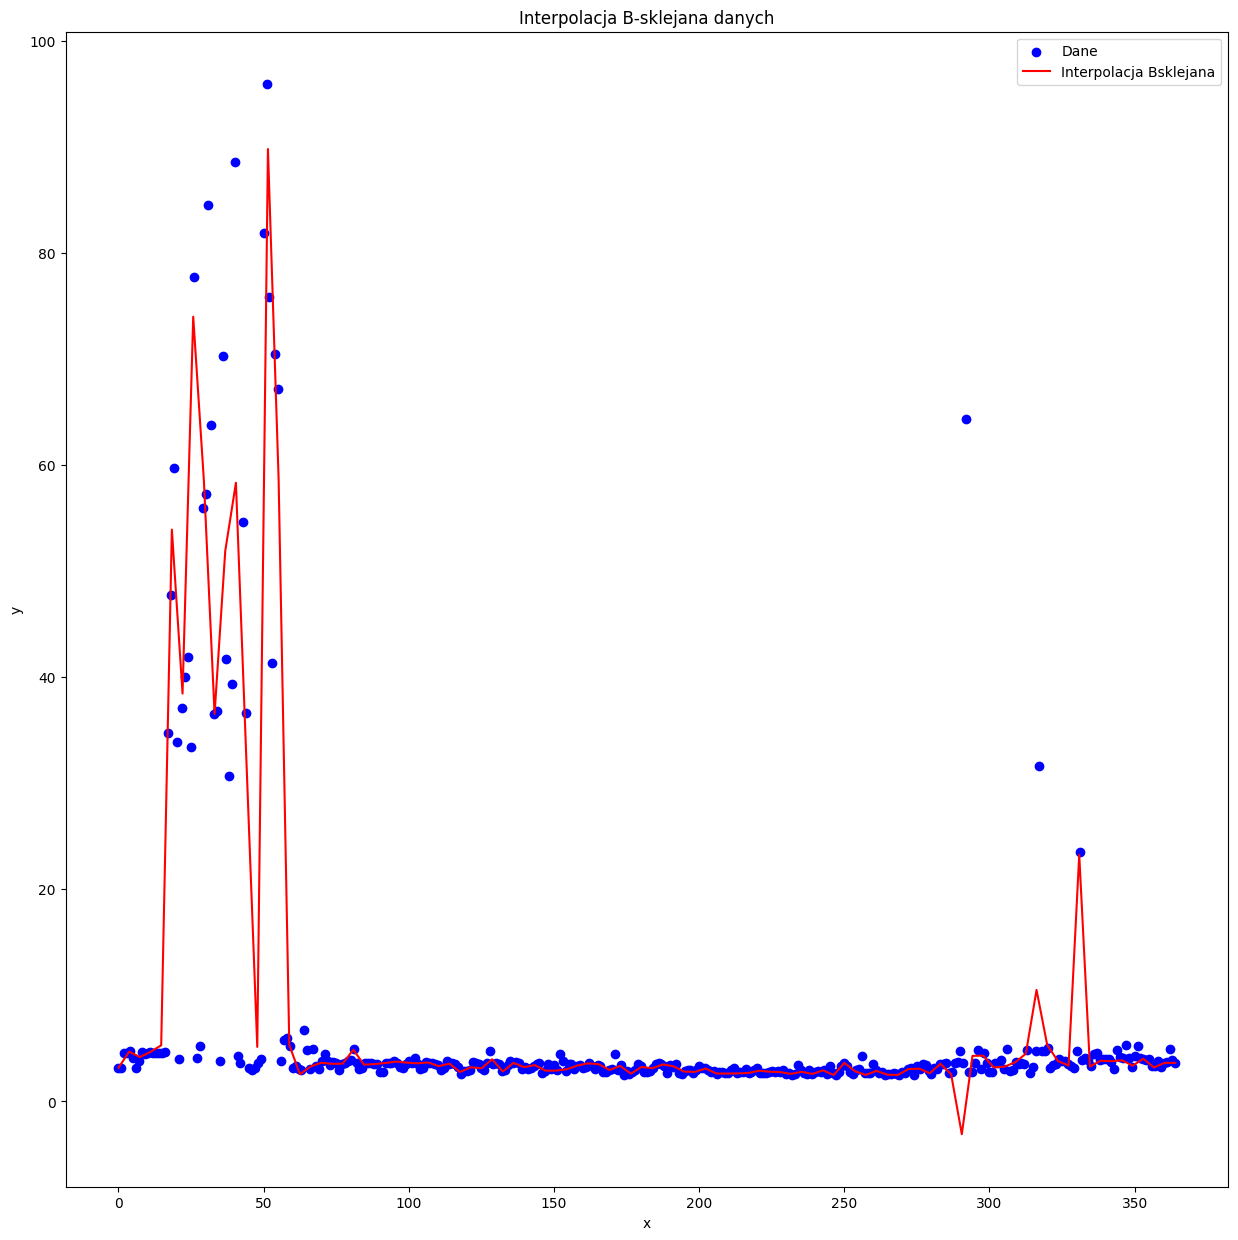

In [59]:
# Interpolacja B-Spline
# Wymiary wykresów
plt.rcParams['figure.figsize'] = [15, 15]
# Przykładowe dane
x_values = np.arange(len(data['date']))
y_values = data['Usage_kWh'].values
# Interpolacja B-sklejana
tck = splrep(x_values, y_values, k=3) # k=3 oznacza stopień krzywej Bsklejanej (tutaj wielomian trzeciego stopnia)
x_interpolated = np.linspace(min(x_values), max(x_values), 100)
y_interpolated = splev(x_interpolated, tck)
# Wykres
plt.scatter(x_values, y_values, color='blue', label='Dane')
plt.plot(x_interpolated, y_interpolated, color='red', label='Interpolacja Bsklejana')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja B-sklejana danych')
plt.legend()

In [60]:
# Obliczenie dokładności za pomocą metody MSE
# Funkcja MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# uzupełnienie danych interpolowanych o brakujące wartości z y_values
y_interpolated = np.interp(x_values, x_interpolated, y_interpolated)

# Obliczenie dokładności
print('Dokładność interpolacji B-Splajn:', mean_squared_error(y_interpolated, y_values))

Dokładność interpolacji B-Splajn: 92.25546741924727


# Wnioski
Interpolacja liniowa okazała się najbardziej dokładna w porównaniu do interpolacji wielomianowej oraz B-Spline